**Студент**: Савин Александр Андреевич  
**Группа**: М80-114М-23  
**Лабороторная работа номер 1**

Библиотеки

In [93]:
from matplotlib import pyplot as plt
import numpy as np

------------------

In [94]:
from abc import ABCMeta, abstractmethod
class Func():
    __metaclass__=ABCMeta

    @abstractmethod
    def full_func():
        print()

    @abstractmethod
    def full_func_gradient():
        print()

    @abstractmethod
    def full_func_draw():
        print()

**Функция Бута**

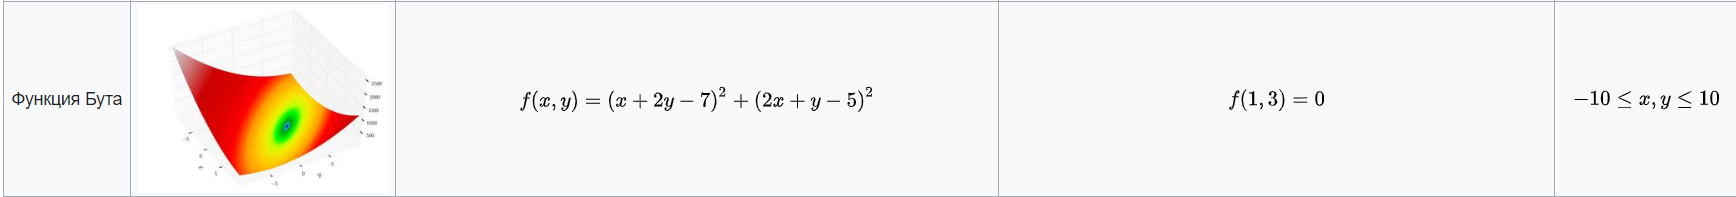

In [95]:
class But(Func):
  def __init__(self):
      self.left_x, self.right_x = -10, 10
      self.left_y, self.right_y = -10, 10
      self.min_xyz = np.array([1, 3, 0])

  def full_func(self, x, y):
      return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

  def full_func_gradient(self, x, y):
      return 10 * x + 8 * y - 34, 8 * x + 10 * y - 38 # dx, dy

  def full_func_draw(self, step = 0.05):
      x = np.arange(self.left_x, self.right_x, step)
      y = np.arange(self.left_y, self.right_y, step)
      X, Y = np.meshgrid(x, y)
      Z = self.full_func(X, Y)

      ax = plt.subplot(projection="3d")
      ax.plot_surface(X, Y, Z, cmap="viridis")
      plt.show()



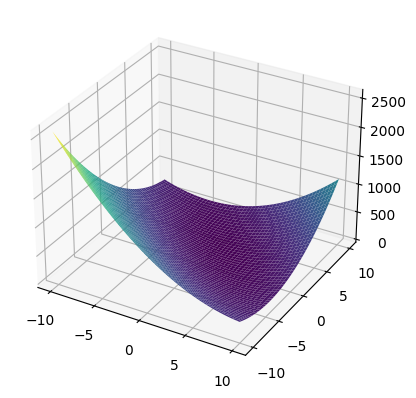

In [96]:
but_func = But()
but_func.full_func_draw()

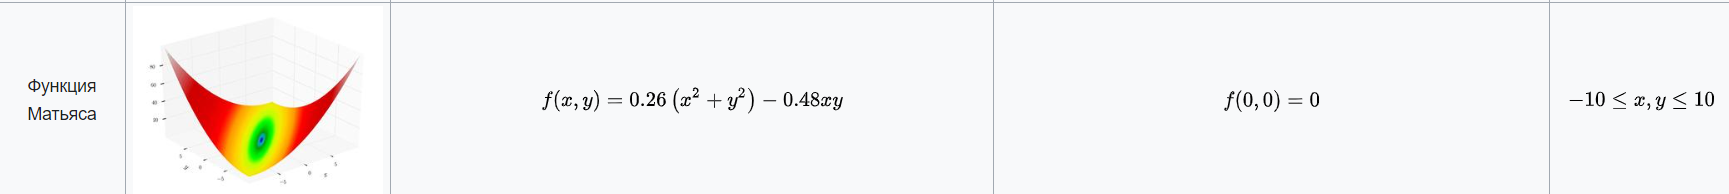

In [97]:
class Matyas():
  def __init__(self):
      self.left_x, self.right_x = -10, 10
      self.left_y, self.right_y = -10, 10
      self.min_xyz = np.array([0, 0, 0])

  def full_func(self, x, y):
      return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y

  def full_func_gradient(self, x, y):
      return 0.52 * x - 0.48 * y, 0.52 * y - 0.48 * x # dx, dy

  def full_func_draw(self, step = 0.05):
      x = np.arange(self.left_x, self.right_x, step)
      y = np.arange(self.left_y, self.right_y, step)
      X, Y = np.meshgrid(x, y)
      Z = self.full_func(X, Y)

      ax = plt.subplot(projection="3d")
      ax.plot_surface(X, Y, Z, cmap="viridis")
      plt.show()


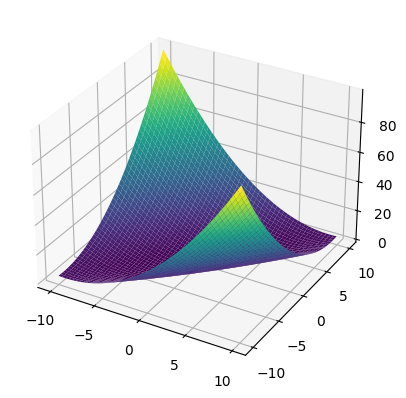

In [98]:
matyas_func = Matyas()
matyas_func.full_func_draw()

---------

In [99]:
from numpy import linalg as la
class GD():
    @staticmethod
    def create_gd (
        nepoch = 1000, lr = 0.01,func = Func(),
        x0 = 0, y0 = 0, min_xyz = np.array([0, 0, 0]), acc = 0.001):

        hist = [np.array([x0, y0, func.full_func(x0,y0)])]
        cur = hist[-1]
        for _ in range(nepoch):
            X_der, Y_der = func.full_func_gradient(cur[0], cur[1])
            X_new, Y_new = cur[0] - lr * X_der, cur[1] - lr * Y_der
            cur = (X_new, Y_new, func.full_func(X_new, Y_new))

            if la.norm(hist[-1] - min_xyz) < acc:
                break

            hist.append(cur)
        print(f"Delta : {la.norm(hist[-1] - min_xyz)}")
        return np.array(hist)

    @staticmethod
    def draw_res(func = Func(), hist = []):
        X_lin = np.linspace(-10, 10, 100)
        Y_lin = np.linspace(-10, 10, 100)
        X, Y = np.meshgrid(X_lin, Y_lin)
        Z = func.full_func(X, Y)

        ax = plt.axes(projection = '3d')
        ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha=0.5)
        ax.plot(hist[:, 0], hist[:, 1], hist[:, 2], c='red', alpha = 0.7)
        ax.plot(hist[-1, 0], hist[-1, 1], hist[-1, 2], 'wo')


Delta : 0.0009815274646372562


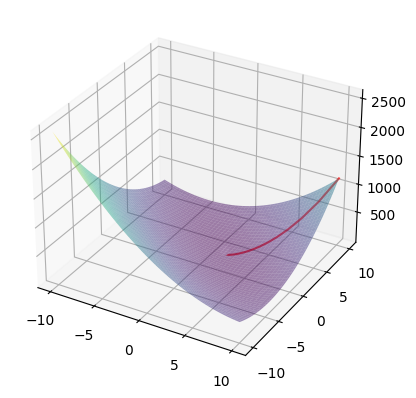

In [100]:
func = but_func
nepoch = 10000
lr = 0.01
x0, y0 = 10, 10
min = but_func.min_xyz
accuracy = 0.001
hist = GD.create_gd(nepoch, lr, func, x0, y0, min, accuracy)
GD.draw_res(func, hist)

Delta : 0.0009990451465006441


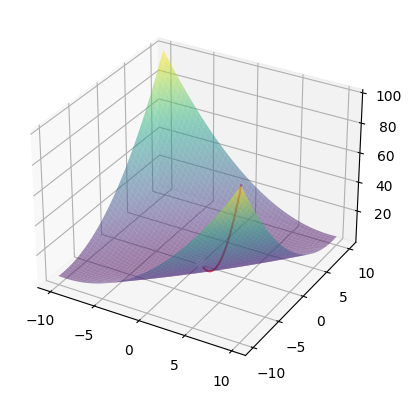

In [102]:
func = matyas_func
nepoch = 10000
lr = 0.01
x0, y0 = 10, -10
min = matyas_func.min_xyz
accuracy = 0.001
hist = GD.create_gd(nepoch, lr, func, x0, y0, min, accuracy)
GD.draw_res(func, hist)